<a href="https://colab.research.google.com/github/ChetanDP07/Underwater-image-enhancement_using_DKT/blob/main/Final_result_UI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Preparations

we clone the repository, set up the envrironment.

In [1]:
%cd /content
!git clone https://github.com/ChetanDP07/Underwater-image-enhancement_using_DKT
%cd Underwater-image-enhancement_using_DKT
!pip install -r requirements.txt

/content
Cloning into 'Underwater-image-enhancement_using_DKT'...
remote: Enumerating objects: 124, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 124 (delta 3), reused 0 (delta 0), pack-reused 106
Receiving objects: 100% (124/124), 40.41 MiB | 45.82 MiB/s, done.
Resolving deltas: 100% (11/11), done.
/content/Underwater-image-enhancement_using_DKT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.6/750.6 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 kB 49.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 59.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 kB 15.2 MB/s eta 0:00:0

# 2. Mounting google drive to colaboratory

* we mount the google drive onto the repository and download the pre-trained model.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import shutil
import os

source_folder = '/content/drive/MyDrive/Pretrained-model'
destination_folder = '/content/Underwater-image-enhancement_using_DKT/exps/dkt_mod/models'

if os.path.exists(destination_folder):
    shutil.rmtree(destination_folder)  # Delete the destination folder if it already exists

shutil.copytree(source_folder, destination_folder)

'/content/Underwater-image-enhancement_using_DKT/exps/dkt_mod/models'

# 2. Upload Images

Upload the images to be processed by Dual key transformer.

In [6]:
import os
import glob
from google.colab import files
import shutil

# to be compatible with BSRGAN

!rm -r dataset/demo_data_Enh/test_data/input
!rm -r dataset/demo_data_Enh/test_data/target
upload_folder = '/content/Underwater-image-enhancement_using_DKT/dataset/demo_data_Enh/test_data/input'
result_folder = '/content/Underwater-image-enhancement_using_DKT/exps/dkt_mod/test_results'

if os.path.isdir(upload_folder):
    shutil.rmtree(upload_folder)
if os.path.isdir(result_folder):
    shutil.rmtree(result_folder)
os.mkdir(upload_folder)
os.mkdir(result_folder)

# upload images
uploaded = files.upload()
for filename in uploaded.keys():
  dst_path = os.path.join(upload_folder, filename)
  print(f'move {filename} to {dst_path}')
  shutil.move(filename, dst_path)

Saving 129_img_.png to 129_img_.png
move 129_img_.png to /content/Underwater-image-enhancement_using_DKT/dataset/demo_data_Enh/test_data/input/129_img_.png


# 3. Evaluating Results

In [10]:
import sys, os
%cd scripts
sys.path.append(os.path.abspath(".."))
%run Enh_eval.py --mode infer

[Errno 2] No such file or directory: 'scripts'
/content/Underwater-image-enhancement_using_DKT/scripts
Model loading successfully!


100%|██████████| 1/1 [00:00<00:00,  4.28it/s]


# Output Image 

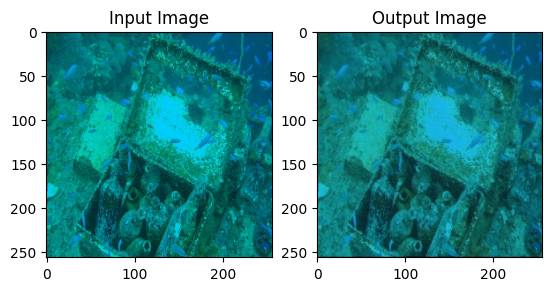

In [13]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
img = Image.open('/content/Underwater-image-enhancement_using_DKT/exps/test_results/0.png')

# Get the dimensions of the image
width, height = img.size

# Divide the image into two parts
input_img = img.crop((0, 0, width // 2, height))
output_img = img.crop((width // 2, 0, width, height))

# Display the input and output images
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.imshow(input_img)
ax1.set_title('Input Image')

ax2.imshow(output_img)
ax2.set_title("Output Image")

plt.show()